In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\kowsar\PycharmProjects\PycharmProjects\pythonProject\venv\Scripts\brain.csv')

In [3]:
h=data.head()
h

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
d=data.describe()
d

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [5]:
data1=data[['Head Size(cm^3)','Brain Weight(grams)']]
data1

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


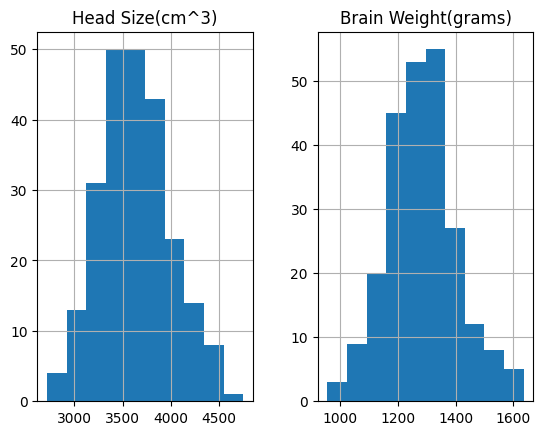

In [6]:
hist=data1.hist()

In [7]:
df=pd.DataFrame(data, columns=['Head Size(cm^3)','Brain Weight(grams)'])
df

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


Text(0, 0.5, 'Brain Weight (grams)')

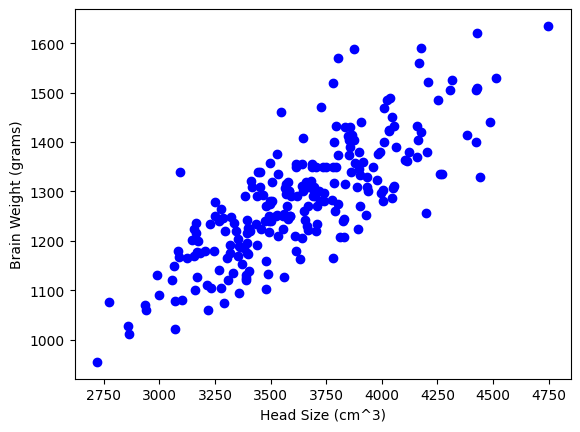

In [8]:
scatter = plt.scatter(df['Head Size(cm^3)'], df['Brain Weight(grams)'], color='blue')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

In [9]:
msk=np.random.rand(len(df))< 0.8
train=df[msk]
test=df[~msk]

In [10]:
print(msk)
print(train)
print(test)

[ True  True  True  True  True  True False  True  True False  True False
 False  True  True  True  True  True False False False False  True  True
  True  True  True False  True  True  True False  True  True False  True
 False  True  True  True False  True False  True False False  True  True
  True  True  True False  True  True  True  True False  True False  True
  True False  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True False  True  True  True False  True  True False False  True  True
  True  True  True  True  True  True False  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True Fa

Text(0, 0.5, 'Brain Weight (grams)')

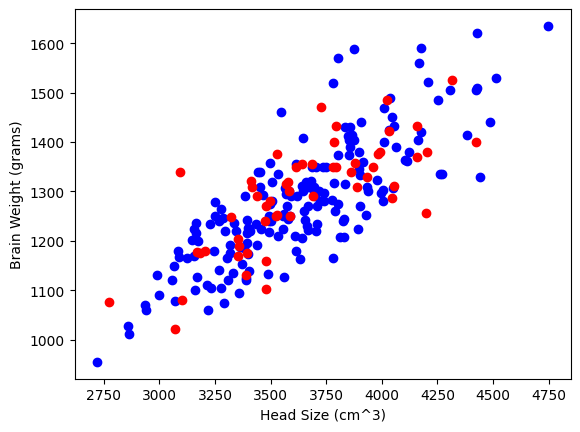

In [11]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train['Head Size(cm^3)'], train['Brain Weight(grams)'], color='blue')
ax1.scatter(test['Head Size(cm^3)'], test['Brain Weight(grams)'], color='red')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

In [12]:
#linear
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Head Size(cm^3)']])
train_y=np.asanyarray(train[['Brain Weight(grams)']])
reg.fit(train_x, train_y)
coefficent=reg.coef_
intercept=reg.intercept_
print('coefficent', coefficent)
print('intercept',intercept)

coefficent [[0.27262005]]
intercept [290.02110078]


In [13]:
#polynomial
#conform my X
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x1=np.asanyarray(train[['Head Size(cm^3)']])
train_y1=np.asanyarray(train[['Brain Weight(grams)']])

test_x1=np.asanyarray(test[['Head Size(cm^3)']])
test_y1=np.asanyarray(test[['Brain Weight(grams)']])

print(train_x1[:3])
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x1)
train_x_poly[:3]

[[4512]
 [3738]
 [4261]]


array([[1.0000000e+00, 4.5120000e+03, 2.0358144e+07],
       [1.0000000e+00, 3.7380000e+03, 1.3972644e+07],
       [1.0000000e+00, 4.2610000e+03, 1.8156121e+07]])

In [14]:
#geting regression
#coefficient
#intercept
reg1=linear_model.LinearRegression()
reg1.fit(train_x_poly,train_y1)
coefficient=reg1.coef_
intercept=reg1.intercept_
print('coefficient', coefficient)
print('intercept', intercept)

coefficient [[ 0.00000000e+00  4.10691763e-01 -1.87422639e-05]]
intercept [38.32785219]


Text(0, 0.5, 'Brain Weight (grams)')

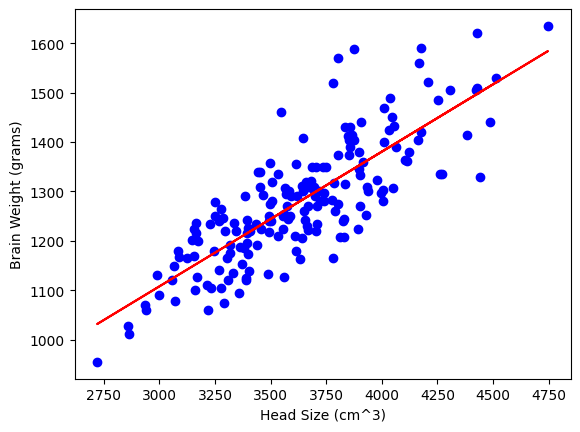

In [15]:
#linear
#graph(line)
plt.scatter(train['Head Size(cm^3)'], train['Brain Weight(grams)'], color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

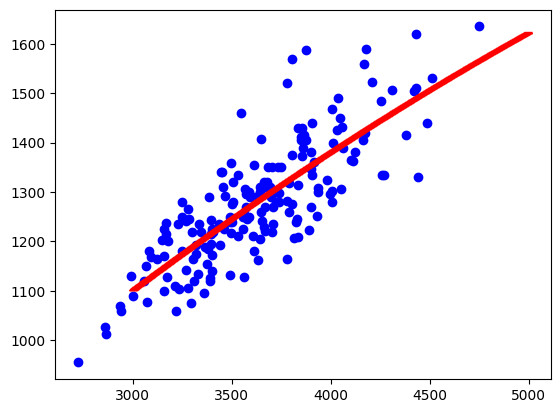

In [16]:
#polynomial
#graph(line)
plt.scatter(train['Head Size(cm^3)'], train['Brain Weight(grams)'], color='blue')
xx=np.arange(3000, 5000.0, 1)
yy=reg1.intercept_[0]+ reg1.coef_[0][1]*xx+ reg1.coef_[0][2]*np.power(xx, 2)
plt.plot(xx, yy, '_r')

In [17]:
#linear
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['Head Size(cm^3)']])
test_y=np.asanyarray(test[['Brain Weight(grams)']])
test_y_=reg.predict(test_x)
MAE=np.mean(np.absolute(test_y_ - test_y))
MSE=np.mean((test_y_ - test_y)**2)
r2=r2_score(test_y, test_y_)
print('MAE', MAE)
print('MSE', MSE)
print('r2_score', r2)

MAE 55.57393506585614
MSE 5302.009989677759
r2_score 0.5339479070724529


In [18]:
#polynomial 
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x1)
test_y_1=reg1.predict(test_x_poly)


MAE=np.mean(np.absolute(test_y_1 - test_y1))
MSE=np.mean((test_y_1 - test_y1)**2)
r2=r2_score(test_y1, test_y_1)

print('MAE', MAE)
print('MSE', MSE)
print('r2', r2)

MAE 55.371858462346395
MSE 5223.34428205005
r2 0.5408627031126143
